[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/stammler/pca_wahlanalyse/HEAD?labpath=notebooks%2Fbeispiel_pca.ipynb)

# Einführung: Hauptkomponentenanalyse

Die [Hauptkomponentenanalyse](https://de.wikipedia.org/wiki/Hauptkomponentenanalyse) (englisch: principal component analysis, PCA) ist ein Werkzeug der Statistik um komplexe, multi-dimensionale Daten vereinfacht darzustellen. Bei der Hauptkomponentenanalyse werden die Daten derart transformiert, dass sie entlang der ersten Achse (der $x$-Achse) die größte Varianz aufweisen, entlang der zweiten Achse ($y$-Achse) die zweitgrößte Varianze, entlang der dritten Achse dir drittgrößte, usw. Daher wird sie auch Hauptachsentransformation genannt. Die Daten korrelieren hierbei nicht entlang den Achsen im transformierten Koordinatensystem.

Als Beispiel dient dieser generierte, zweidimensionale Datensatz. Die Daten werden aus einem Mittelwert und einer Kovarianzmatrix generiert.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.dpi"] = 200.

In [3]:
mu = np.array([1., 1.])
cov = np.array(
    [[ 0.5, -0.4],
     [-0.4,  1.5]]
)
N = 1000

In [4]:
X = np.random.multivariate_normal(mu, cov, N)

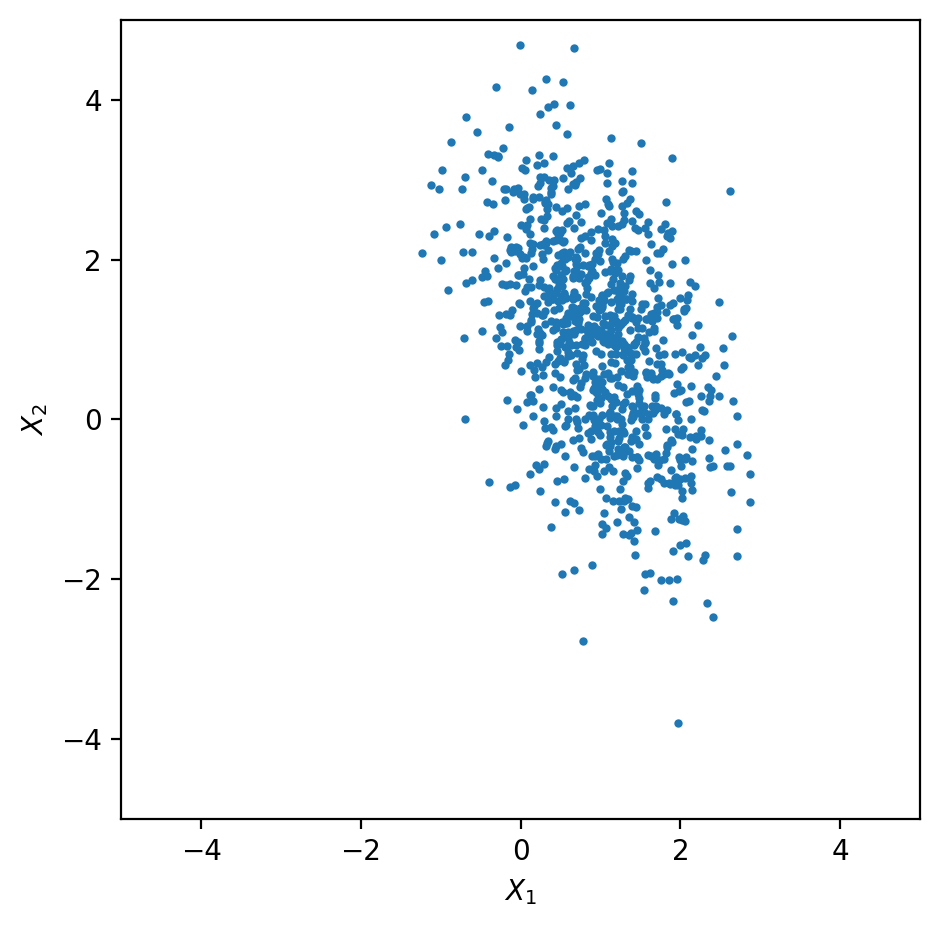

In [5]:
lim = np.ceil(np.abs(X).max())
fig, ax = plt.subplots(figsize=(4.8, 4.8))
ax.plot(X[:, 0], X[:, 1], ".", markersize=4)
ax.set(
    aspect=1.,
    xlim=[-lim, lim], ylim=[-lim, lim],
    xlabel=r"$X_1$", ylabel=r"$X_2$",
)
fig.set_layout_engine("tight")

Aus den generierten Daten lässt sich die Kovarianzmatrix errechnen, um zu bestätigen, dass tatsächlich die anfangs gewählte Matrix reproduziert wird.

In [6]:
cov_X = np.cov(X.T)

In [7]:
cov, cov_X

(array([[ 0.5, -0.4],
        [-0.4,  1.5]]),
 array([[ 0.52410681, -0.40941152],
        [-0.40941152,  1.56309295]]))

Die Kovarianzmatrix lässt sich wie folgt darstellen.

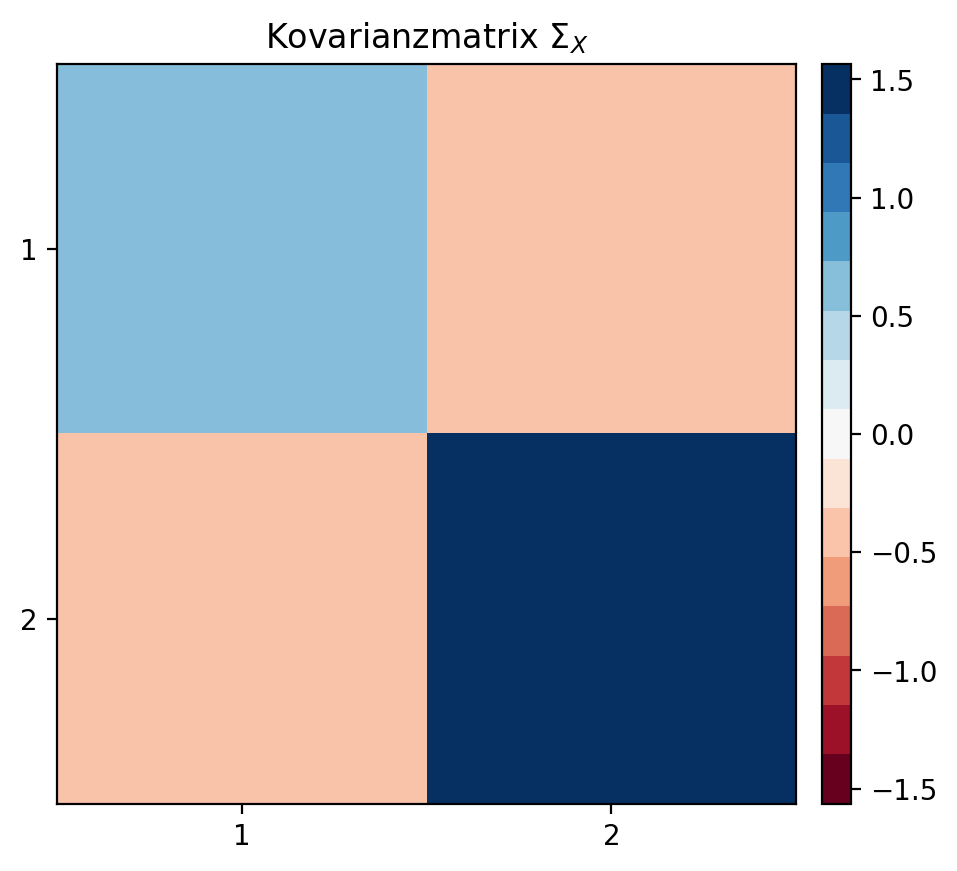

In [8]:
lim = np.abs(cov_X).max()
ticks = np.arange(2)
cmap = plt.get_cmap("RdBu", 15)
fig, ax = plt.subplots(figsize=(4.8, 4.8))
p = ax.imshow(cov_X, cmap=cmap, vmin=-lim, vmax=lim)
ax.set(
    aspect=1.,
    title=r"Kovarianzmatrix $\Sigma_X$",
    xticks=ticks, xticklabels=ticks+1,
    yticks=ticks, yticklabels=ticks+1,
)
pos = ax.get_position()
cb_ax = fig.add_axes([1.03*pos.x1, pos.y0, 0.03, pos.y1-pos.y0])
cbar = plt.colorbar(p, cax=cb_ax)

Ein größerer $\left(2, 2\right)$-Wert als der $\left(1, 1\right)$-Wert bedeutet hierbei, dass die Varianz der Daten entlang der $X_2$-Achse (der $y$-Achse) größer ist als entlang der $X_2$-Achse (der $x$-Achse). Ein negativer $\left(1, 2\right)$-Wert bzw. $\left(2, 1\right)$-Wert bedeutet, dass die Daten zwischen beiden Achsen antikorrelieren: ein größerer $X_1$-Wert bedeutet ein kleinerer $X_2$-Wert.

Das ist genau das, was man im ersten Plot beobachten kann.

Das Ziel der Hauptachsenzerlegung ist nun, die Koordinaten derart zu transformieren, dass die Daten entlang der $X_1$-Achse die größte Varianz aufweisen. Das funktioniert wie folgt.

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()
Y = pca.fit_transform(X)

Die Daten sehen im neuen Koordinatensystem nun so aus.

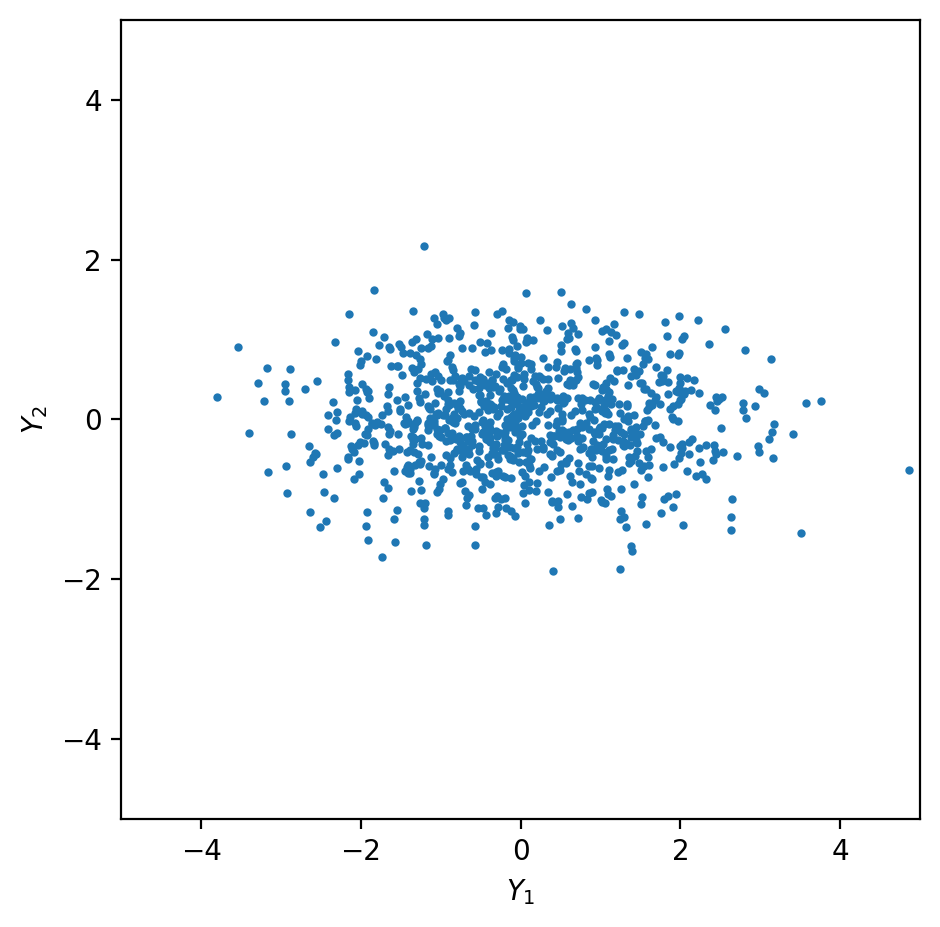

In [11]:
lim = np.ceil(np.abs(Y).max())
fig, ax = plt.subplots(figsize=(4.8, 4.8))
ax.plot(Y[:, 0], Y[:, 1], ".", markersize=4)
ax.set(
    aspect=1.,
    xlim=[-lim, lim], ylim=[-lim, lim],
    xlabel=r"$Y_1$", ylabel=r"$Y_2$",
)
fig.set_layout_engine("tight")

Wie gewünscht haben die Daten die größte Varianz entlang der $X_1$-Achse und es besteht keine Korrelation zwischen $X_1$ und $X_2$. Das lässt sich auch an der neuen Kovarianzmatrix ablesen.

In [12]:
cov_Y = np.cov(Y.T)

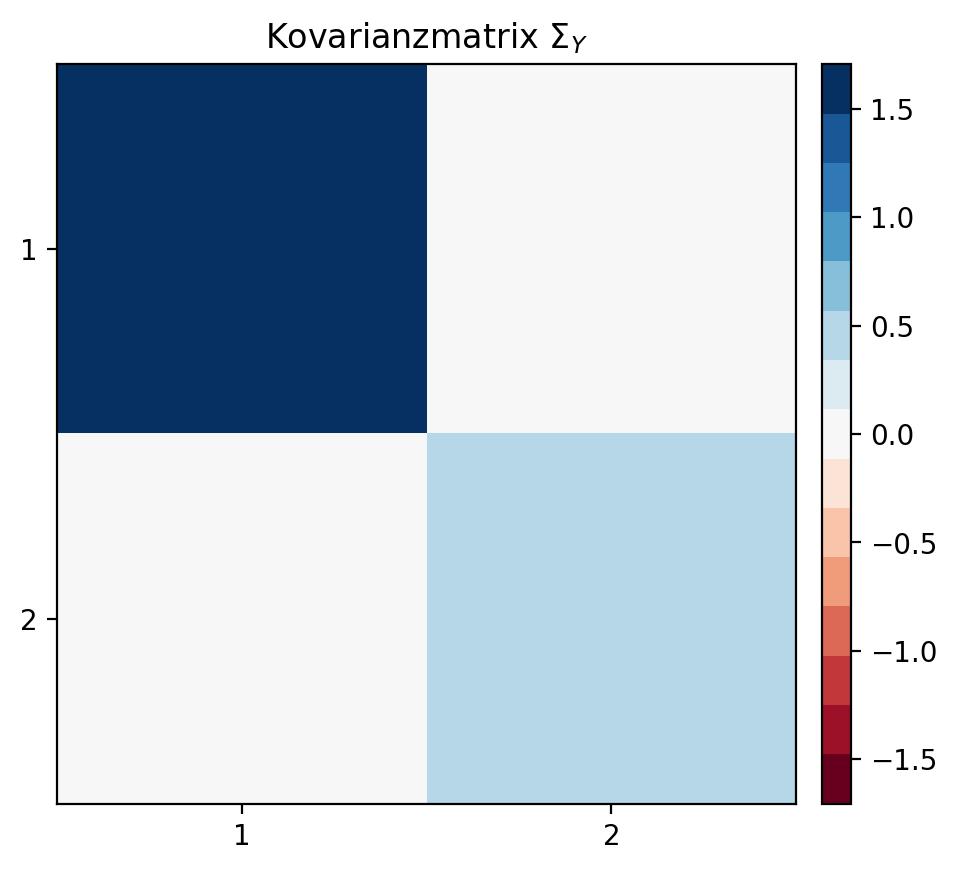

In [13]:
lim = np.abs(cov_Y).max()
ticks = np.arange(2)
cmap = plt.get_cmap("RdBu", 15)
fig, ax = plt.subplots(figsize=(4.8, 4.8))
p = ax.imshow(cov_Y, cmap=cmap, vmin=-lim, vmax=lim)
ax.set(
    aspect=1.,
    title=r"Kovarianzmatrix $\Sigma_Y$",
    xticks=ticks, xticklabels=ticks+1,
    yticks=ticks, yticklabels=ticks+1,
)
pos = ax.get_position()
cb_ax = fig.add_axes([1.03*pos.x1, pos.y0, 0.03, pos.y1-pos.y0])
cbar = plt.colorbar(p, cax=cb_ax)

Das neue Koordinatensystem lässt sich auch zu Anschauungszwecken in das alte einzeichnen.

In [14]:
E = pca.components_

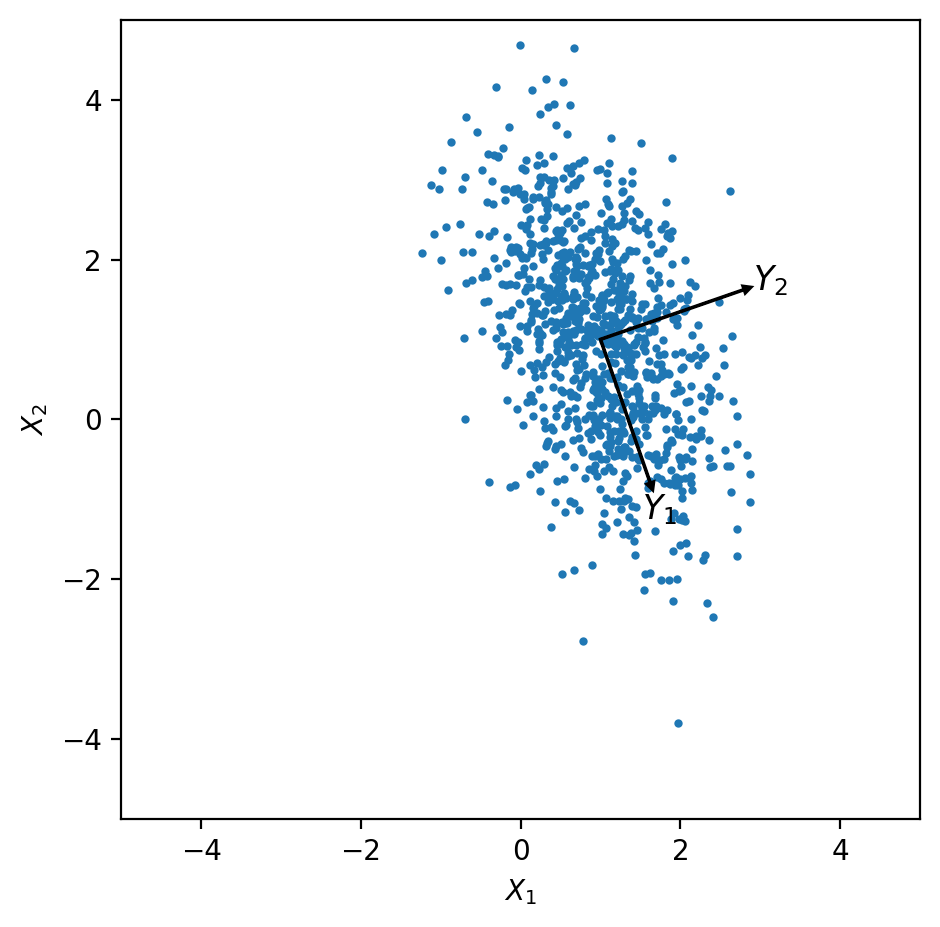

In [15]:
lim = np.ceil(np.abs(X).max())
fig, ax = plt.subplots(figsize=(4.8, 4.8))
ax.plot(X[:, 0], X[:, 1], ".", markersize=4)
ax.arrow(mu[0], mu[1], 2*E[0, 0], 2*E[0, 1], zorder=2, length_includes_head=True, head_width=0.1, head_length=0.1, width=0.01, color="black")
ax.arrow(mu[0], mu[1], 2*E[1, 0], 2*E[1, 1], zorder=2, length_includes_head=True, head_width=0.1, head_length=0.1, width=0.01, color="black")
ax.text((mu+2.25*E[0, :])[0], (mu+2.25*E[0, :])[1], "$Y_1$", ha="center", va="center", fontsize="large")
ax.text((mu+2.25*E[1, :])[0], (mu+2.25*E[1, :])[1], "$Y_2$", ha="center", va="center", fontsize="large")
ax.set(
    aspect=1.,
    xlim=[-lim, lim], ylim=[-lim, lim],
    xlabel=r"$X_1$", ylabel=r"$X_2$"
)
fig.set_layout_engine("tight")

## Anwendungsbeispiel: Politische Positionen

Die Hauptkomponentenanalyse kann nur zur Analyse von Positionen politischer Parteien eingesetzt werden.

Angenommen fünf Parteien werden jeweils zu ihren Positionen zu drei Thesen befragt und können jeweils mit _"stimme zu"_, _"stimme nicht zu"_ und _"neutral"_ antworten. Den Antworten kann man entsprechend die Zahlenwerte $1$, $-1$ und $0$ zuordnen. Die Positionen der Parteien lassen sich dann in einem dreidimensionalen Koordinatensystem darstellen, wobei die drei Achsen die Thesen darstellen und die Positionen der Parteien deren Koordinaten.

In [16]:
X = np.array([
    [ 0,  0,  0],
    [-1, -1,  1],
    [-1, -1, -1],
    [ 0, -1, -1],
    [ 1,  1,  1],
])

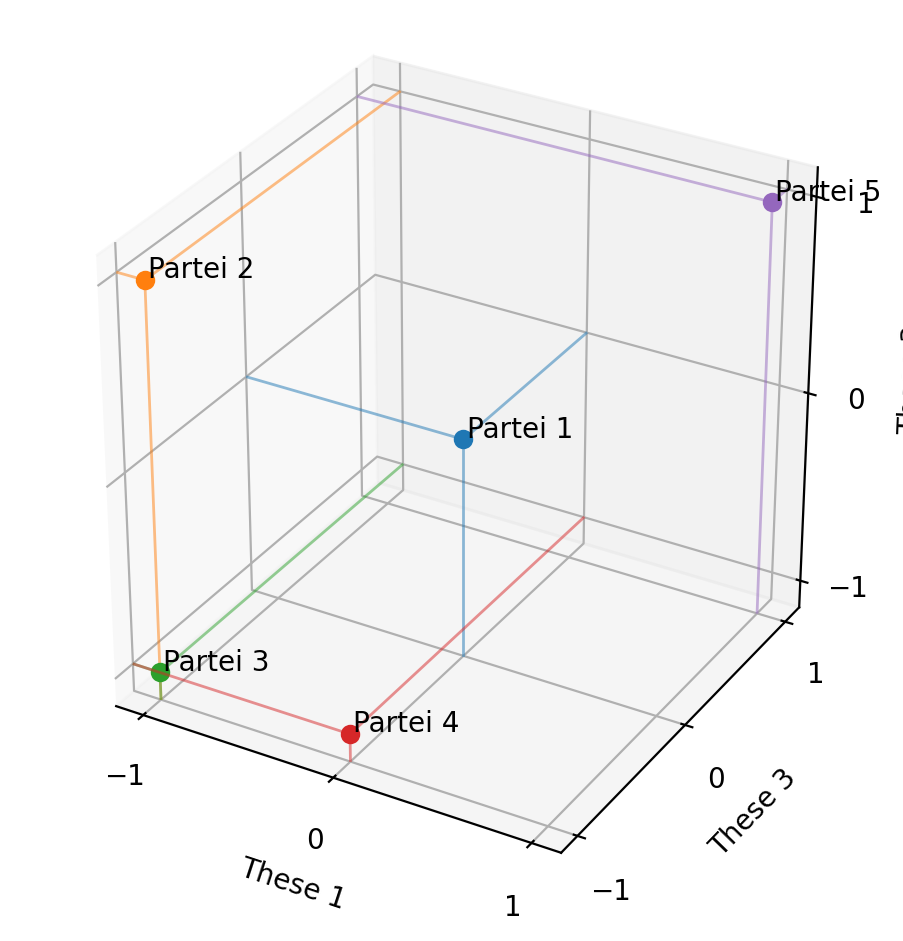

In [17]:
lim = 1.1
ticks = np.arange(-1., 2., 1.)
fig = plt.figure(figsize=(4.8, 4.8))
ax = fig.add_subplot(111, projection="3d")
ax.set_aspect("equal")
minmax = [-1.14, 1.14]
for i in range(X.shape[0]):
    p = ax.plot(X[i, 0], X[i, 1], X[i, 2], "o")
    ax.text(X[i, 0]+0.01, X[i, 1]+0.01, X[i, 2]+0.01, "Partei {:d}".format(i+1))
    ax.plot([X[i, 0], minmax[0]], [X[i, 1],   X[i, 1]], [X[i, 2],   X[i, 2]], c=p[0].get_color(), alpha=0.5, lw=1., ls="-")
    ax.plot([X[i, 0],   X[i, 0]], [X[i, 1], minmax[1]], [X[i, 2],   X[i, 2]], c=p[0].get_color(), alpha=0.5, lw=1., ls="-")
    ax.plot([X[i, 0],   X[i, 0]], [X[i, 1],   X[i, 1]], [X[i, 2], minmax[0]], c=p[0].get_color(), alpha=0.5, lw=1., ls="-")
ax.set(
    xlim=[-lim, lim], ylim=[-lim, lim], zlim=[-lim, lim],
    xticks=ticks, yticks=ticks, zticks=ticks,
    xlabel=r"These 1", ylabel=r"These 3", zlabel=r"These 3",
)
fig.set_layout_engine("tight")

Drei Dimensionen sind schon schwierig darstellbar. Ab vier Dimensionen wird es praktisch unmöglich, geschweige denn mit $>30$ Dimensionen. Üblicherweise projeziert man das Problem auf zwei Dimensionen und verwirft die restlichen. Bei obigem Problem würde das bedeuten, man betrachtet nur die Achsen der ersten beiden Thesen. So als würde man von oben auf den Würfel entlang der $z$-Achsen schauen.

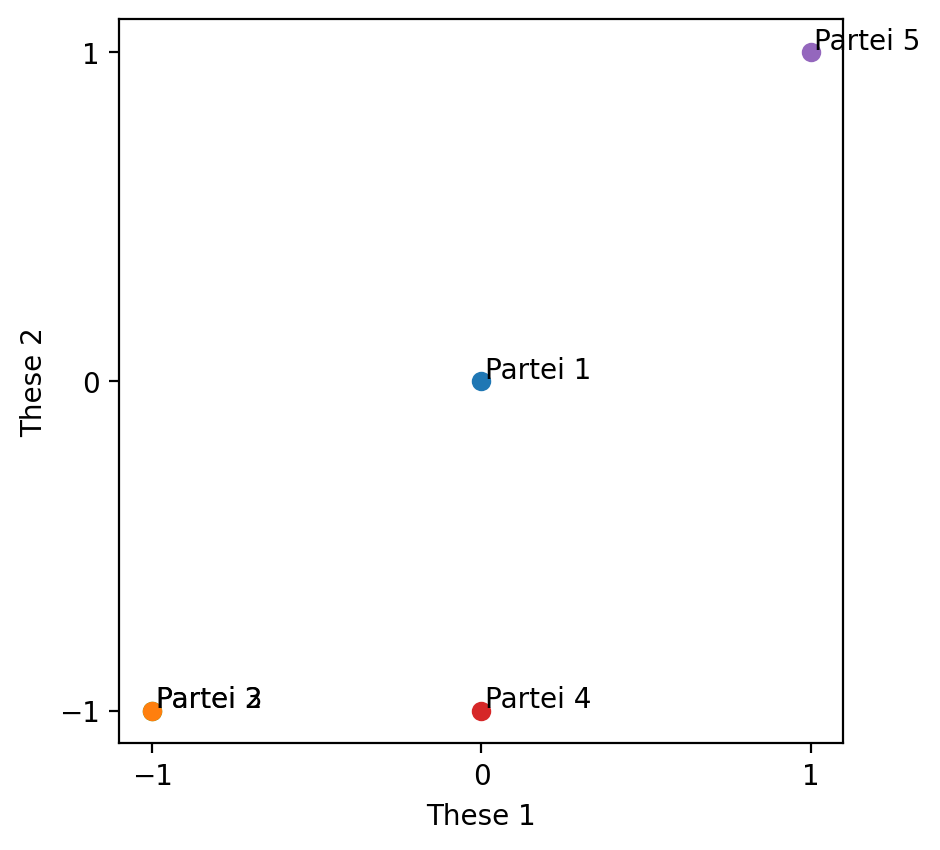

In [18]:
lim = 1.1
ticks = np.arange(-1., 2., 1.)
fig, ax = plt.subplots(figsize=(4.8, 4.8))
ax.set_aspect(1)
for i in range(X.shape[0]-1, -1, -1):
    p = ax.plot(X[i, 0], X[i, 1], "o", c="C{:d}".format(i))
    ax.text(X[i, 0]+0.01, X[i, 1]+0.01, "Partei {:d}".format(i+1))
ax.set(
    aspect=1.,
    xlim=[-lim, lim], ylim=[-lim, lim],
    xticks=ticks, yticks=ticks,
    xlabel=r"These 1", ylabel=r"These 2",
)
fig.set_layout_engine("tight")

Diese Darstellung hat mehrere Probleme. Zum einen überlappen die Parteien $2$ und $3$. Es entsteht der Eindruck als würde sie sich politisch nahe stehen, obwohl sowohl Partei $1$ als auch Partei $4$ im dreidimensionalen Raum näher an Partei $3$ sind als Partei $2$. Zum anderen wird nur Information von zwei Thesen verwendet. Es würde in dieser Darstellung keinen Sinn ergeben, Parteien zu mehr als zwei Thesen zu befragen.

Die Lösung hier ist die Hauptkomponentenanalyse. Bevor der dreidimensionale Datenwürfel auf zwei Dimensionen reduziert wird, wird er derart gedreht, dass die Parteien entlang der neuen $x$-Richtung die Größte Varianz aufweisen.

In [19]:
pca = PCA()
Y = pca.fit_transform(X)

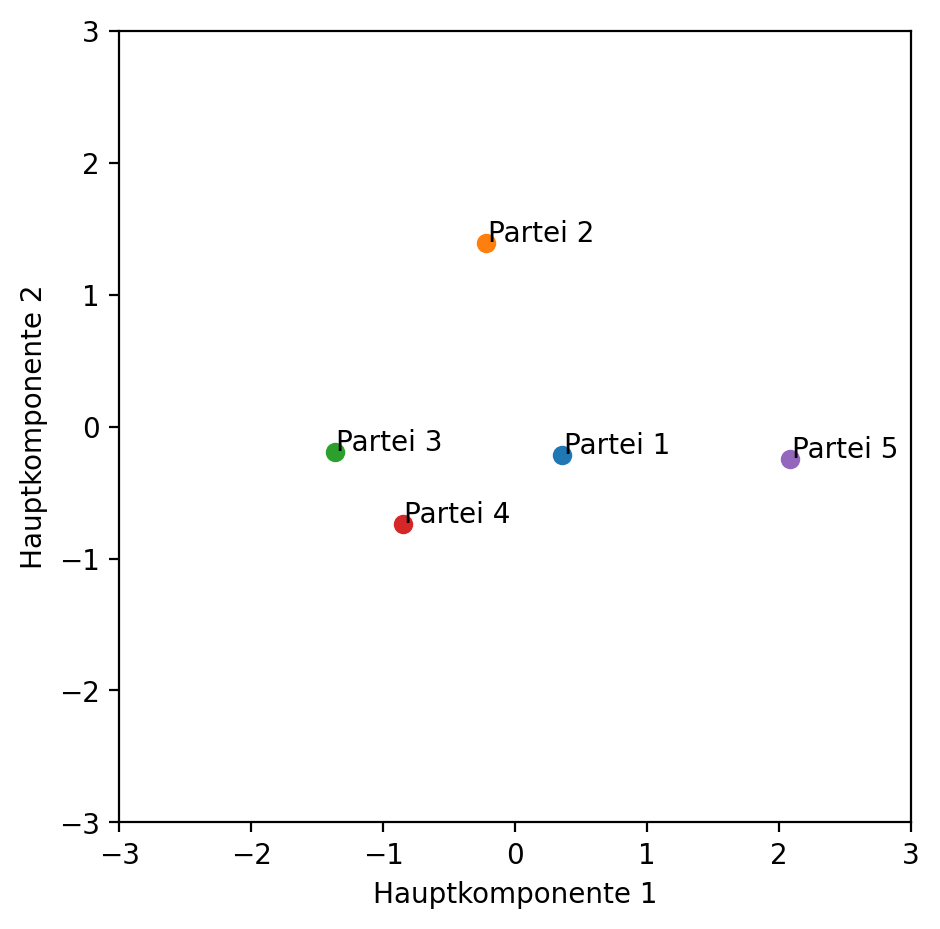

In [20]:
lim = np.ceil(np.abs(Y).max())

ticks = np.arange(-lim, lim+1, 1.)
fig, ax = plt.subplots(figsize=(4.8, 4.8))
for i in range(Y.shape[0]):
    p = ax.plot(Y[i, 0], Y[i, 1], "o")
    ax.text(Y[i, 0]+0.01, Y[i, 1]+0.01, "Partei {:d}".format(i+1))
ax.set(
    aspect=1.,
    xlim=[-lim, lim], ylim=[-lim, lim],
    xticks=ticks, yticks=ticks,
    xlabel=r"Hauptkomponente 1", ylabel=r"Hauptkomponente 2",
)
fig.set_layout_engine("tight")

Das neue Koordinatensystem verwendet Informationen aus allen drei ursprünglichen Koordinaten und somit allen Thesen, obwohl die finale Darstellung nur zweidimensional ist. Der Abstand der Parteien voneinander spiegelt den tatsächlichen Abstand genauer wider als die ursprüngliche Projektion.

Die Hauptkomponentenanalyse hat noch weitere interessante Eigenschaften, die sich am besten an einem realen Beispiel mit Daten aus dem [Wahl-O-Maten](https://www.bpb.de/themen/wahl-o-mat/) der [Bundeszentral für politische Bildung](https://www.bpb.de/) veranschaulichen lassen.